# Name:Padarthy Yagnesh Sai
# Question-3
3. Implement the K Nearest Neighbors algorithm and test the algorithm using any data
set of your choice. The output should include Accuracy, Error rate, Precision, and
recall rate along with the confusion matrix.

In [17]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df= pd.read_csv("diabetes.csv")

In [28]:
#Display the first 5 rows
df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Shape of the dataset
shape = df.shape
print(f"The shape of the data set is {shape}")


The shape of the data set is (768, 9)


In [30]:
# describe() method for the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#info() method for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
#Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Splitting dataset into train and test sets
X= df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [10]:
#Normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Model building
classifier = KNeighborsClassifier(n_neighbors=5)

In [33]:
#Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict output
y_pred = classifier.predict(X_test)


In [22]:
# Performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, classification_report
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# Error rate
error_rate = 1 - accuracy
print("Error rate: ", error_rate)
# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)
# Recall rate
recall = recall_score(y_test, y_pred, average='macro')
print("Recall rate: ", recall)
# Classification Report
print("Classification Report\n")
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[77 17]
 [26 34]]
Accuracy:  0.7207792207792207
Error rate:  0.27922077922077926
Precision:  0.7071197411003236
Recall rate:  0.6929078014184398
Classification Report

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        94
           1       0.67      0.57      0.61        60

    accuracy                           0.72       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.72      0.72       154



In [ ]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

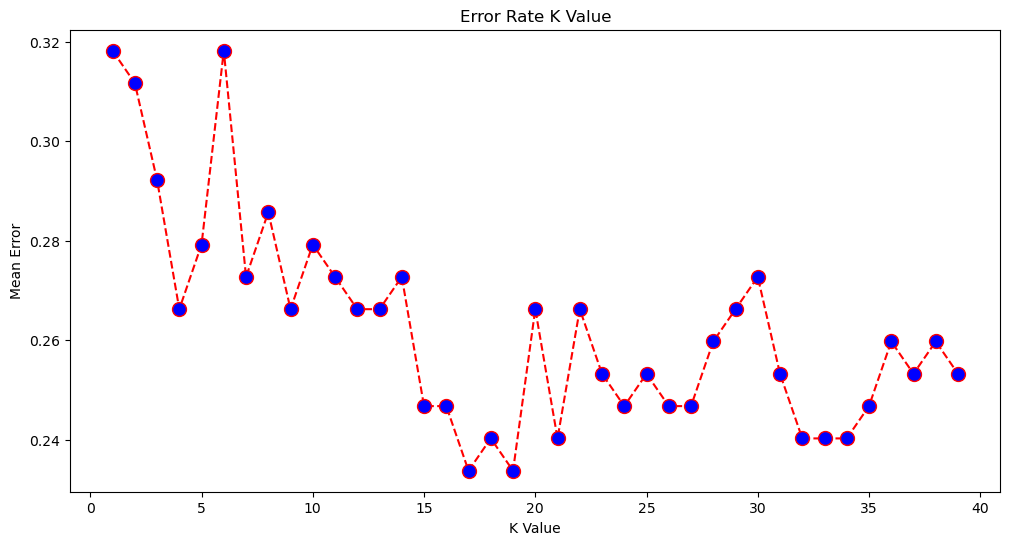

In [27]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')